In [1]:
from PIL import Image
filepath='/mnt/FS_data/ms2487/workshop/1_FloraMask/2_MyDiv/2_data/UAV_data/03_Orthoimage_Sept_15_alt_2022/2022_09_16_15_alt_ortho_softmesh-0-1.tif'

im = Image.open(filepath)
im.save(filepath.replace('.tif', '.png'))



DecompressionBombError: Image size (900000000 pixels) exceeds limit of 178956970 pixels, could be decompression bomb DOS attack.

In [1]:
!gdal_translate -of JPEG -co QUALITY=85 '/mnt/FS_data/ms2487/workshop/1_FloraMask/2_MyDiv/2_data/UAV_data/03_Orthoimage_Sept_15_alt_2022/2022_09_16_15_alt_ortho_softmesh-0-1.tif' output.jpeg


/bin/bash: line 1: gdal_translate: command not found


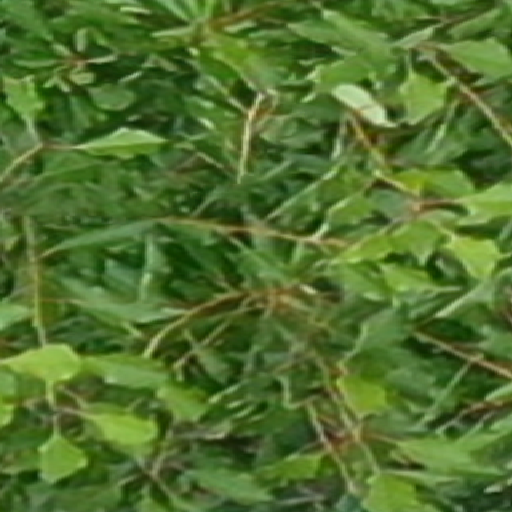

In [20]:
from PIL import Image
import requests

# url = 'http://images.cocodataset.org/val2017/000000039769.jpg'
# image = Image.open(requests.get(url, stream=True).raw)
# image

#image = Image.open('/home/as2114/code/Flora_Mask/output.jpeg')
image = Image.open('/mnt/FS_data/ms2487/workshop/1_FloraMask/2_MyDiv/2_data/UAV_data/Orthoimage_cropped/mydiv_   9967.png')
image

In [11]:
from transformers import MaskFormerImageProcessor

checkpoint_name = "facebook/maskformer-swin-small-coco"

processor = MaskFormerImageProcessor.from_pretrained(checkpoint_name)

/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/transformers/utils/deprecation.py:165: FutureWarning: `max_size` is deprecated and removed starting from version 4.27.0 for `MaskFormerImageProcessor.__init__`.
  return func(*args, **kwargs)
/home/as2114/miniconda3/envs/mask2former/lib/python3.8/site-packages/transformers/utils/deprecation.py:165: UserWarning: The following named arguments are not valid for `MaskFormerImageProcessor.__init__` and were ignored: 'feature_extractor_type'
  return func(*args, **kwargs)


In [12]:
inputs = processor(image, return_tensors="pt")
inputs.keys()

dict_keys(['pixel_values', 'pixel_mask'])

In [21]:
print(inputs['pixel_values'].shape)

torch.Size([1, 3, 800, 800])


In [14]:
import torch
from transformers import MaskFormerForInstanceSegmentation

model = MaskFormerForInstanceSegmentation.from_pretrained(checkpoint_name)

with torch.no_grad():
    outputs = model(**inputs)

In [22]:
semantic_segmentation = processor.post_process_semantic_segmentation(outputs)[0]
semantic_segmentation.shape

torch.Size([200, 200])

In [16]:
%matplotlib


Using matplotlib backend: <object object at 0x7feb94459a90>


/tmp/ipykernel_3611087/2934474912.py:9: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  viridis = cm.get_cmap('viridis', torch.max(segmentation))


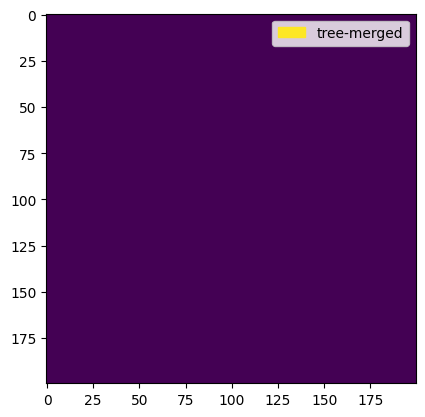

In [23]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from matplotlib import cm


def draw_semantic_segmentation(segmentation):
    # get the used color map
    viridis = cm.get_cmap('viridis', torch.max(segmentation))
    # get all the unique numbers
    labels_ids = torch.unique(segmentation).tolist()
    fig, ax = plt.subplots()
    ax.imshow(segmentation)
    handles = []
    for label_id in labels_ids:
        label = model.config.id2label[label_id]
        color = viridis(label_id)
        handles.append(mpatches.Patch(color=color, label=label))
    ax.legend(handles=handles)
    return fig

draw_semantic_segmentation(semantic_segmentation)